# Join (combine) Data

![Data Science Workflow](img/ds-workflow.png)

## Acquire Data
- Often we need to combine data from different sources

### pandas DataFrames
- pandas DataFrames can combine data ([pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf))
- `concat([df1, df2], axis=0)`: [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) Concatenate pandas objects along a particular axis 
- `df.join(other.set_index('key'), on='key')`: [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) Join columns of another DataFrame.
- `df1.merge(df2, how='inner', on='a')` [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) Merge DataFrame or named Series objects with a database-style join

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('./files/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv', skiprows=4)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [5]:
meta = pd.read_csv('./files/API_SP/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv')
meta.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [7]:
len(data), len(meta)

(266, 265)

In [11]:
#df1.merge(df2, how='inner', on='a')
dataset = data.merge(meta, how='inner', on='Country Code')

dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,Unnamed: 65,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,105361.0,105846.0,106310.0,106766.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,36296111.0,37171922.0,38041757.0,38928341.0,NaN,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,423769930.0,435229381.0,446911598.0,458803476.0,NaN,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,29816769.0,30809787.0,31825299.0,32866268.0,NaN,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [12]:
len(dataset)

265

<AxesSubplot:xlabel='Region'>

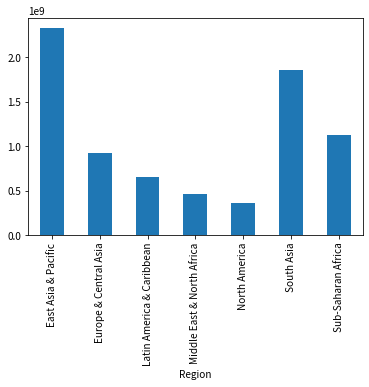

In [15]:
dataset.groupby('Region').sum()['2020'].plot.bar()

In [16]:
dataset.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65',
       'Region', 'IncomeGroup', 'SpecialNotes', 'TableName', 'Unnamed: 5'],
      dtype='object')

<AxesSubplot:xlabel='IncomeGroup'>

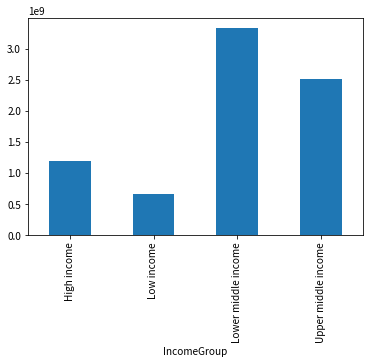

In [17]:
dataset.groupby('IncomeGroup').sum()['2020'].plot.bar()